In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from pysr import PySRRegressor
from IPython.display import Markdown as md

In [2]:
def error(data,model):
    if len(data) != len(model):
        print('ERROR: array must have the same length!')
        return
    
    l = len(data)
    error = []
    
    for i in range(l):
        error.append(abs((data[i] - model[i])**2 / data[i]**2))
    
    return np.array(error)

In [3]:
def accuracy(data, model):
    if len(data) != len(model):
        print('ERROR: array must have the same length!')
        return
    
    l = len(data)
    total_error = 0
    
    for i in range(l):
        error = abs((data[i] - model[i]) / data[i])
        total_error += error
    
    avg_error = total_error / l
    accuracy_percentage = 100 * (1 - avg_error)
    
    return accuracy_percentage


In [4]:
tf = pd.read_csv('TF_16.csv')
k = tf['k (h/Mpc)'].values
x = tf['x'].values
T = tf['T(k)'].values

Let's define a Regressor:

In [5]:
model = PySRRegressor(
    model_selection="best",
    niterations=1000,  # < Increase me for better results
    
    binary_operators=["+","*","-","/","^"],
    constraints={'^': (2, 1)},
    nested_constraints={"^": {"^": 2}},
    maxsize=20,
    loss="loss(prediction, target) = (prediction - target)^2",
    # ^ Custom loss function (julia syntax)
    turbo=True,  
    #cluster_manager=cluster[1],
    #multithreading=True,
)

In [31]:
def bran(x,T,T_f):
    fig, axs = plt.subplots(1, 2, figsize=(18, 6))
    axs[0].scatter(x,T, s=1, label='CLASS data')
    axs[0].scatter(x, T_f, s=1, label='From PySR')
    axs[0].loglog()
    axs[0].set_title('Computed vs SR')
    axs[0].legend()

    axs[1].scatter(k,error(T,T_f))
    axs[1].set_title('Error')
    axs[1].loglog()

    print('The accuracy of the model is: ',accuracy(T,T_f))


# try #1 (29/08)

$$    T(x)=\frac{{(0.6802852^{0.07809298})}}{{x_0 + \left(\left(\frac{{(x_0^{1.5150192})}}{{0.07809298}} + x_0\right) + x_0\right) \cdot (x_0 \cdot 0.6802852)}} \cdot x_0 = \frac{1}{1.031+1.402x+8.977x^{1.515}}$$

In [6]:
model.from_file('87accuracy-2908.pkl')

Checking if 96accuracy-2908.pkl exists...
Loading model from 96accuracy-2908.pkl


PySRRegressor.equations_ = [
	    pick     score                                           equation  \
	0         0.000000                                         0.59597707   
	1         2.727410                                 (0.031959273 ^ x0)   
	2         0.273589                   ((0.03856033 ^ x0) * 0.97440577)   
	3         0.148748  (((0.033028357 ^ x0) * 0.95535845) - -0.020184...   
	4         0.247018  (((0.054214504 ^ x0) - -0.09725388) / (1.11956...   
	5         0.163339  (((0.018899752 ^ x0) + 0.17701131) / ((x0 ^ 1....   
	6         0.006272  (((0.022751944 ^ x0) + 0.17833948) / (((x0 ^ 1...   
	7         0.105146  (((0.018303636 ^ x0) + 0.17364132) / ((x0 - -1...   
	8         0.000149  (((0.018303636 ^ x0) + (0.17364132 ^ 0.9995132...   
	9   >>>>  0.118298  (((0.6802852 ^ 0.082423635) / (x0 + ((((x0 ^ 1...   
	10        0.025445  (((0.6802852 ^ 0.07809298) / (x0 + (((((x0 ^ 1...   
	11        0.003974  (((0.6802852 ^ 0.07809298) / (x0 + (((((x0 ^ 1...   
	12        0.003711  (((0.6802852 ^ 0.07809298) / (x0 + (((((x0 ^ 1...   
	
	        loss  complexity  
	0   0.171494           1  
	1   0.000733           3  
	2   0.000424           5  
	3   0.000315           7  
	4   0.000192           9  
	5   0.000139          11  
	6   0.000137          13  
	7   0.000111          15  
	8   0.000111          17  
	9   0.000088          19  
	10  0.000083          21  
	11  0.000083          23  
	12  0.000082          25  
]

In [7]:
df = pd.read_csv('87accuracy-2908.csv')
print(df['Equation'][10])

(((0.6802852 ^ 0.07809298) / (x0 + (((((x0 ^ 1.5150192) / 0.07809298) + x0) + x0) * (x0 * 0.6802852)))) * x0)


In [8]:
T_f = (((0.6802852**0.07809298) / (x + (((((x**1.5150192) / 0.07809298) + x) + x) * (x * 0.6802852)))) * x)
pr = 1 / (1.031 + 8.977 * x ** 1.515 + 1.402 * x)

The accuracy of the model is:  87.71864672725393


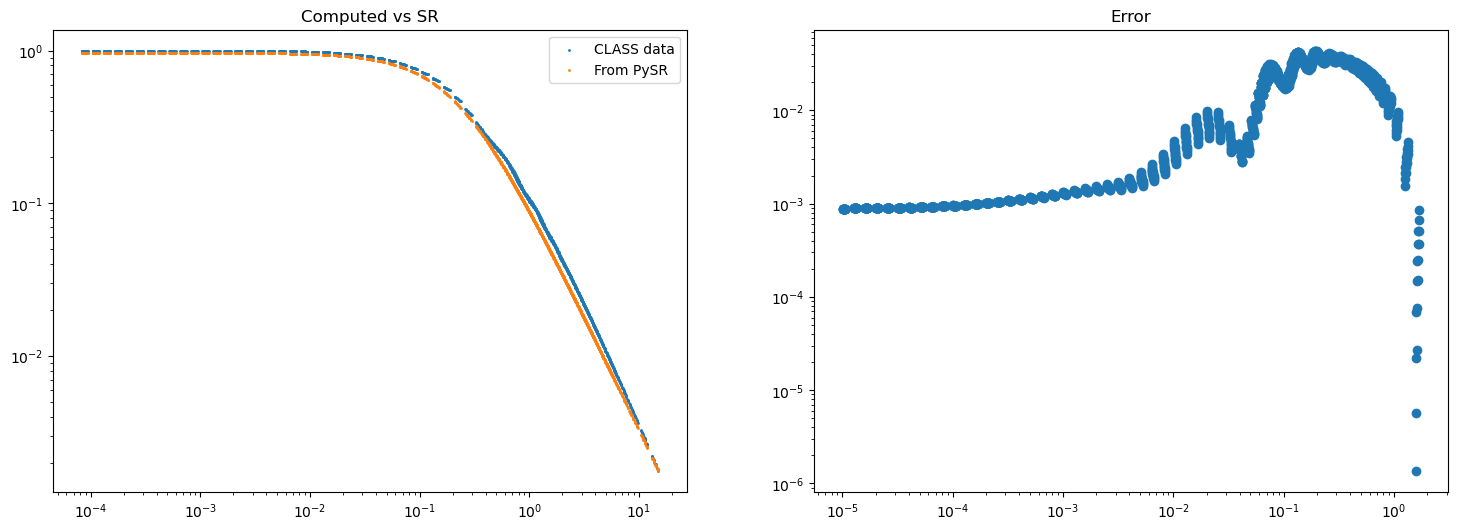

In [33]:
bran(x,T,T_f)

# try #2 (30/08)
$$\frac{0.974}{x_{0} + 8.67 x_{0}^{1.44} + 1.00}$$

The accuracy of the model is:  91.50753045113265


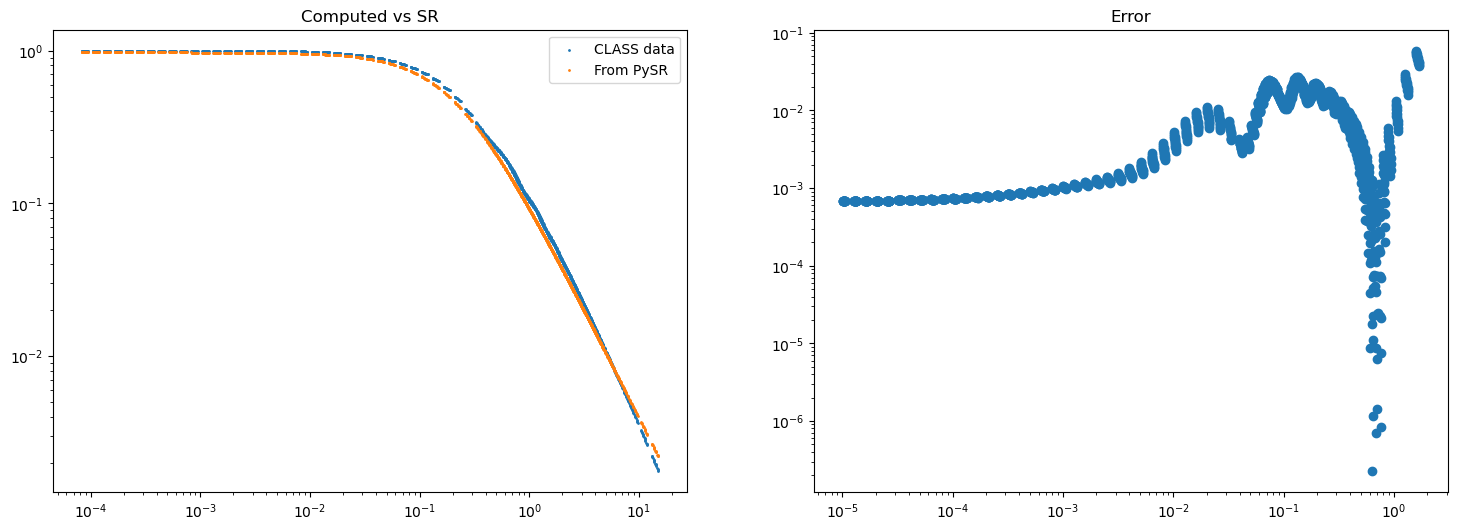

In [34]:
T_2 = 0.974 / (x + 8.67 * x ** 1.44 + 1.00)
bran(x,T,T_2)

# try #3 (1st of 31/08)
$$Tt(x)=\left( \frac{{(0.6802852^{0.07809298})}}{{x + \left( \left( \frac{{(x^{1.5150192})}}{{0.07809298}} + (x \cdot 0.8601349) \right) + x \right) \cdot (x \cdot 0.6802852)}} \right) \cdot x = \frac{1}{1.031+1.304x+8.977x^{1.515}}$$

In [35]:
model.from_file('1sttry-3108.pkl')

Checking if 1sttry-3108.pkl exists...
Loading model from 1sttry-3108.pkl


PySRRegressor.equations_ = [
	    pick     score                                           equation  \
	0         0.000000                                          0.3413778   
	1         2.647246                                 (0.065094896 ^ x0)   
	2         0.254468                   ((0.04709757 ^ x0) + 0.02362304)   
	3         1.915137     (0.11657493 / (0.11657493 + (x0 ^ 1.3768004)))   
	4         0.014136  ((0.11700422 / (0.116933994 + (x0 ^ 1.375199))...   
	5         0.011929  ((0.11691301 / (0.11691301 + (x0 ^ 1.375199)))...   
	6         0.041433  ((0.11691301 / (0.11700422 + (x0 ^ 1.3737894))...   
	7         0.018469  ((0.11691874 / (0.11691874 + (x0 ^ 1.375199)))...   
	8         0.003045  ((0.11691301 / (0.11691874 + (x0 ^ 1.375199)))...   
	9         0.013409  ((0.11691301 / (0.11691874 + (x0 ^ 1.3737894))...   
	10  >>>>  0.074769  ((0.11691874 / (0.11691301 + (x0 ^ 1.3768004))...   
	11        0.039038  ((0.11691874 / (0.11691301 + ((x0 ^ 1.3768004)...   
	12        0.021386  ((0.11691301 / (0.11691874 + (((x0 ^ 1.3768004...   
	
	        loss  complexity  
	0   0.161981           1  
	1   0.000813           3  
	2   0.000489           5  
	3   0.000011           7  
	4   0.000010           9  
	5   0.000010          11  
	6   0.000009          13  
	7   0.000009          15  
	8   0.000009          17  
	9   0.000009          19  
	10  0.000007          21  
	11  0.000007          23  
	12  0.000007          25  
]

In [36]:
df = pd.read_csv('96accuracy-2908.csv')
print(df['Equation'][11])

(((0.6802852 ^ 0.07809298) / (x0 + (((((x0 ^ 1.5150192) / 0.07809298) + (x0 * 0.8601349)) + x0) * (x0 * 0.6802852)))) * x0)


The accuracy of the model is:  88.18833443330468


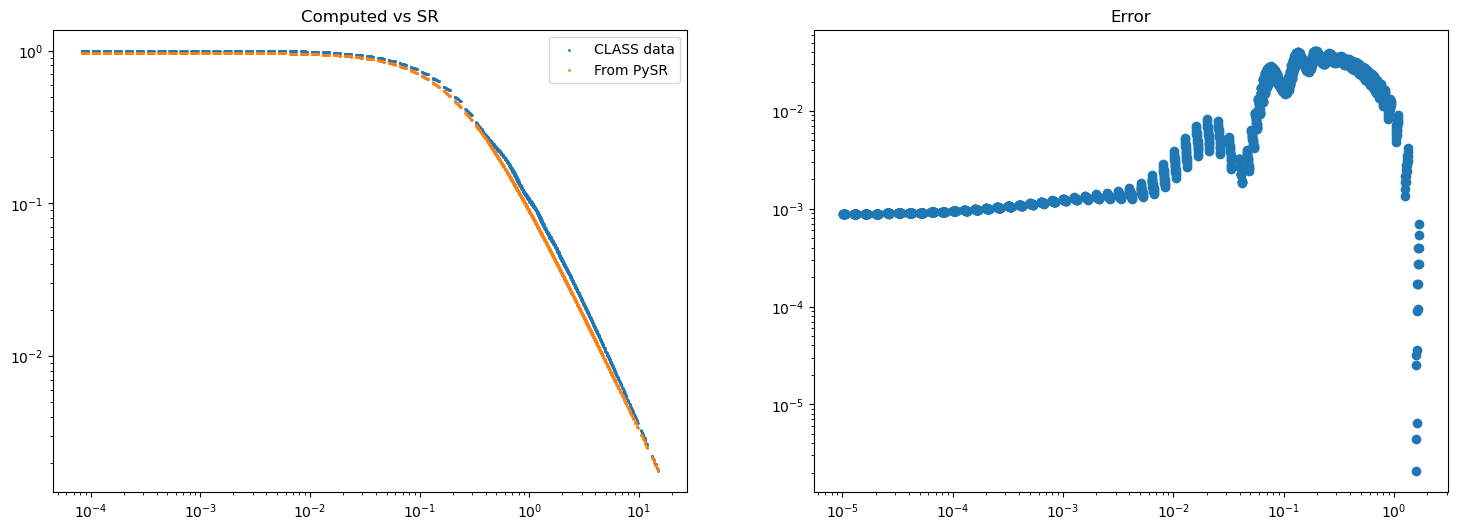

In [37]:
T_3 = (((0.6802852 ** 0.07809298) / (x + (((((x ** 1.5150192) / 0.07809298) + (x * 0.8601349)) + x) * (x * 0.6802852)))) * x)
bran(x,T,T_3)